In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as sts
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
import nltk
import os

In [3]:
data = pd.read_csv("dnm_bt.csv")

In [4]:
na_numeric = ['Aboard', 'Fatalities', 'Ground']

for col in na_numeric:
    data[col].fillna(0, inplace = True)


In [5]:
data['Date'] = pd.to_datetime(data['Date']).dt.strftime("%m/%d/%Y")
data['Date'].head(5)


0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

In [6]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Year'].head(5)

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [7]:
a=data['Time'].dropna()
b=a.str[:2]
import collections
counter=collections.Counter(b)
print(counter)
# Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})

print(counter.values())
# [4, 4, 2, 1, 2]



Counter({'09': 183, '19': 181, '11': 172, '15': 171, '10': 167, '14': 166, '12': 166, '13': 157, '16': 156, '17': 155, '20': 154, '18': 147, '08': 140, '07': 132, '23': 111, '21': 108, '22': 106, '06': 85, '02': 77, '04': 65, '01': 64, '00': 63, '05': 60, '03': 49, 'c:': 6, '1:': 2, 'c1': 2, '2:': 2, '8:': 1, '9:': 1})
dict_values([155, 85, 147, 167, 64, 171, 111, 60, 140, 132, 108, 77, 157, 183, 6, 106, 154, 65, 166, 166, 63, 49, 181, 172, 156, 2, 2, 2, 1, 1])


In [8]:
data['Hours'] = b



In [9]:
df_nan=data[data['Hours'].notna()]
df_nan

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,17
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,06
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,18
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...,1915,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...,2009,06
5262,05/03/2009,12:00,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,NaN,Patrol,Mi-35,EV08114,NaN,18.0,18.0,0.0,The helicopter was patrolling along the Venezu...,2009,12
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,06
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,00


In [10]:
data[::]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,17
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,06
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,NaN
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,18
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,06
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,0.0,The cargo plane crashed while on approach to I...,2009,NaN
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,00
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,08


In [11]:
data['Survived'] = data['Aboard'] - (data['Fatalities'] + data['Ground'])
data.Survived = np.where(data.Survived < 0, 0, data.Survived)
data.Ground[::-1]

5267    0.0
5266    0.0
5265    0.0
5264    0.0
5263    2.0
       ... 
4       0.0
3       0.0
2       0.0
1       0.0
0       0.0
Name: Ground, Length: 5268, dtype: float64

In [12]:
data['Proportion'] = (data['Ground'] / (data['Fatalities'] + data['Ground']))*100
data.Proportion = np.where(data.Proportion < 0, 0, data.Proportion)



In [13]:
data[::-1]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours,Survived,Proportion
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...,2009,NaN,0.0,0.0
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,08,0.0,0.0
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,00,0.0,0.0
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,0.0,The cargo plane crashed while on approach to I...,2009,NaN,0.0,0.0
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,06,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,0.0,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,18,6.0,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,NaN,0.0,0.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,06,0.0,0.0


In [14]:
data.describe()


,Aboard,Fatalities,Ground,Year,Survived,Proportion
count,5268.000000,5268.000000,5268.000000,5268.000000,5268.000000,5219.00000
mean,27.439446,20.022589,1.602126,1971.300304,7.377183,1.74126
std,43.023370,33.175910,53.875057,22.387541,28.028707,11.11202
min,0.000000,0.000000,0.000000,1908.000000,0.000000,0.00000
25%,5.000000,3.000000,0.000000,1954.000000,0.000000,0.00000
50%,13.000000,9.000000,0.000000,1973.000000,0.000000,0.00000
75%,30.000000,23.000000,0.000000,1990.000000,2.000000,0.00000
max,644.000000,583.000000,2750.000000,2009.000000,516.000000,100.00000


In [15]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette('tab20')

In [16]:
total_accs_year = data[['Year', 'Date']].groupby('Year').count()
total_accs_year = total_accs_year.reset_index()
total_accs_year.columns = ['Year', 'Frequency']

Text(0.5, 0, '')

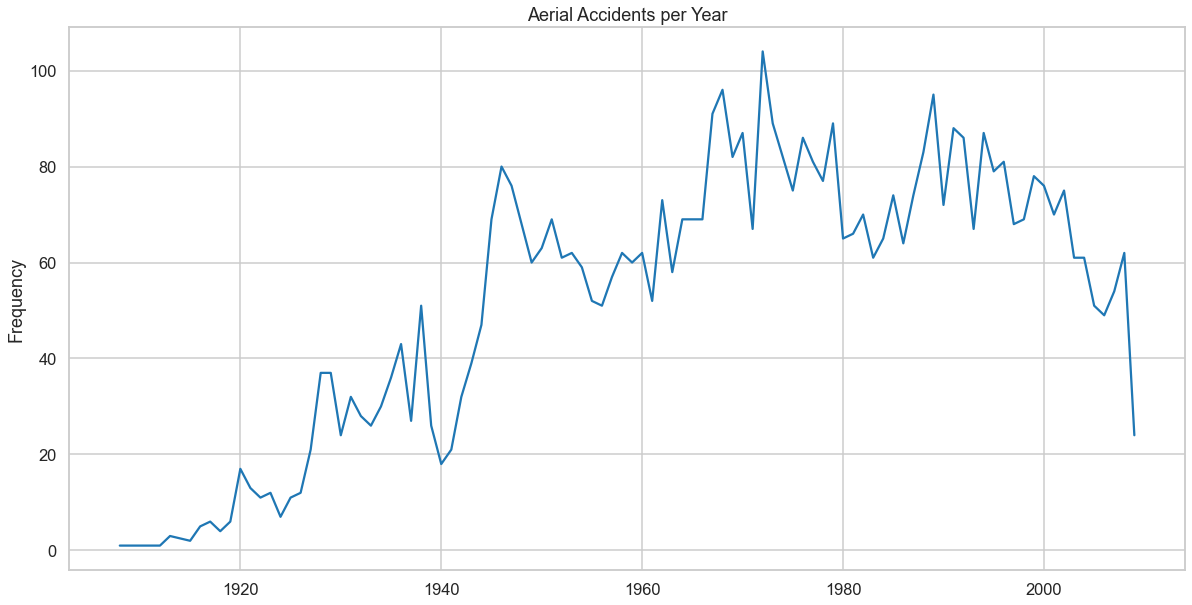

In [17]:
sns.lineplot(x = 'Year', y = 'Frequency', data = total_accs_year)
plt.title('Aerial Accidents per Year')
plt.xlabel('')


In [18]:
#summarise
deaths_year = data[['Year', 'Fatalities', 'Ground']].groupby('Year').sum()
deaths_year.reset_index(inplace = True)
deaths_year['Deaths'] = deaths_year['Fatalities'] + deaths_year['Ground']

Text(0.5, 0, 'Frequency')

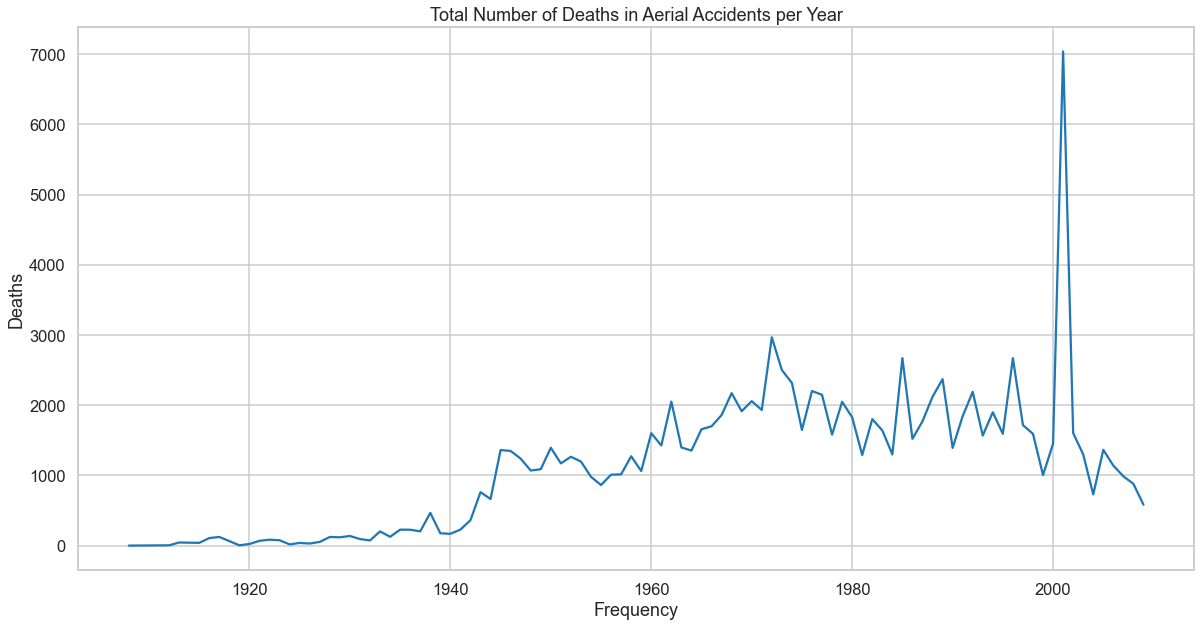

In [19]:
# Plot
sns.lineplot(x = 'Year', y = 'Deaths', data = deaths_year)
plt.title('Total Number of Deaths in Aerial Accidents per Year')
plt.xlabel('Frequency')

In [20]:
# summarise
aboard_per_year = data[['Year', 'Aboard']].groupby('Year').sum()
aboard_per_year = aboard_per_year.reset_index()

Text(0, 0.5, 'Frequency')

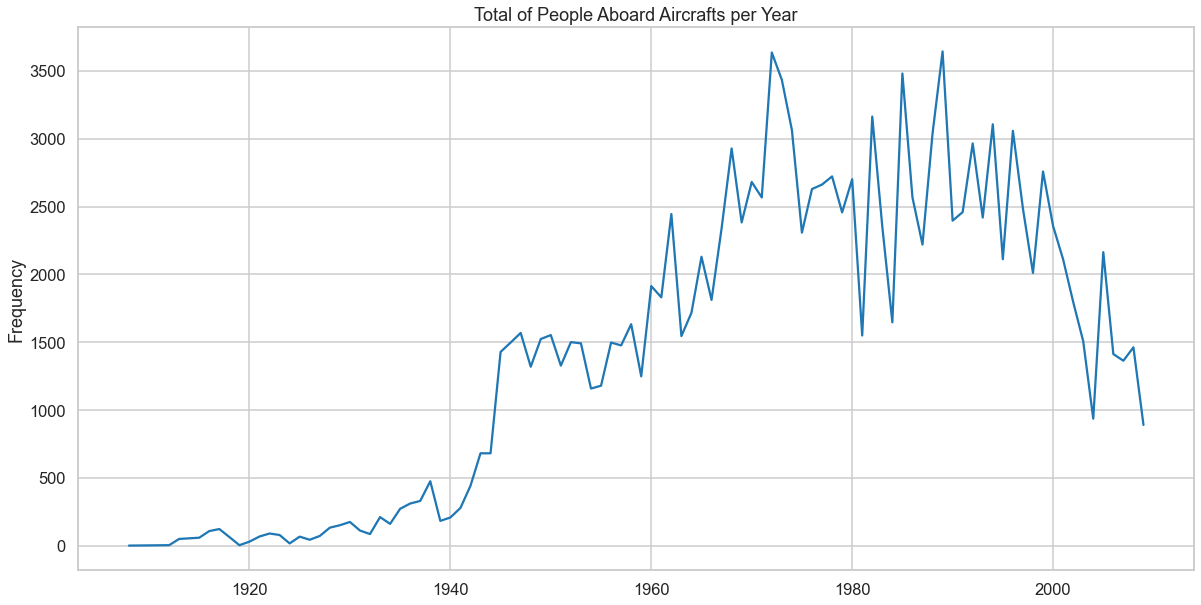

In [21]:
# plot
sns.lineplot(x = 'Year', y = 'Aboard', data = aboard_per_year)
plt.title('Total of People Aboard Aircrafts per Year')
plt.xlabel('')
plt.ylabel('Frequency')


In [22]:
# summarise
aboard_per_year = df_nan[['Hours', 'Fatalities']].groupby('Hours').sum()
aboard_per_year = aboard_per_year.reset_index()

In [23]:
aboard_per_year

,Hours,Fatalities
0,00,1641.0
1,01,1957.0
2,02,2138.0
3,03,1094.0
4,04,1692.0
5,05,1243.0
6,06,1963.0
7,07,3544.0
8,08,3460.0
9,09,3500.0


In [24]:
aboard_per_year =aboard_per_year.drop(labels=[28,27,26,25,20], axis=0)
aboard_per_year

,Hours,Fatalities
0,00,1641.0
1,01,1957.0
2,02,2138.0
3,03,1094.0
4,04,1692.0
5,05,1243.0
6,06,1963.0
7,07,3544.0
8,08,3460.0
9,09,3500.0


Text(0, 0.5, 'Fatalities')

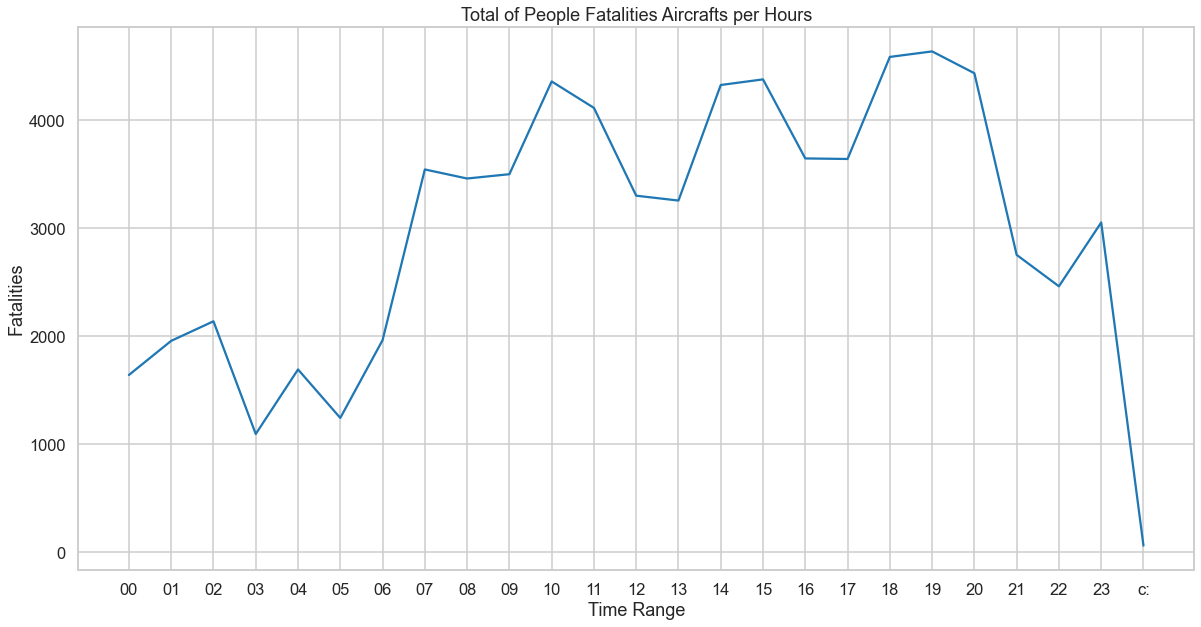

In [25]:
# plot
sns.lineplot(x = 'Hours', y = 'Fatalities', data = aboard_per_year)
plt.title('Total of People Fatalities Aircrafts per Hours')
plt.xlabel('Time Range')
plt.ylabel('Fatalities')

In [26]:
sts.pearsonr(data.Fatalities, data.Aboard)


(0.7569242287226605, 0.0)

In [27]:
sts.spearmanr(data.Fatalities, data.Aboard)


SpearmanrResult(correlation=0.7729747858599402, pvalue=0.0)

Text(0.5, 1.0, 'Fatalities x People Aboard')

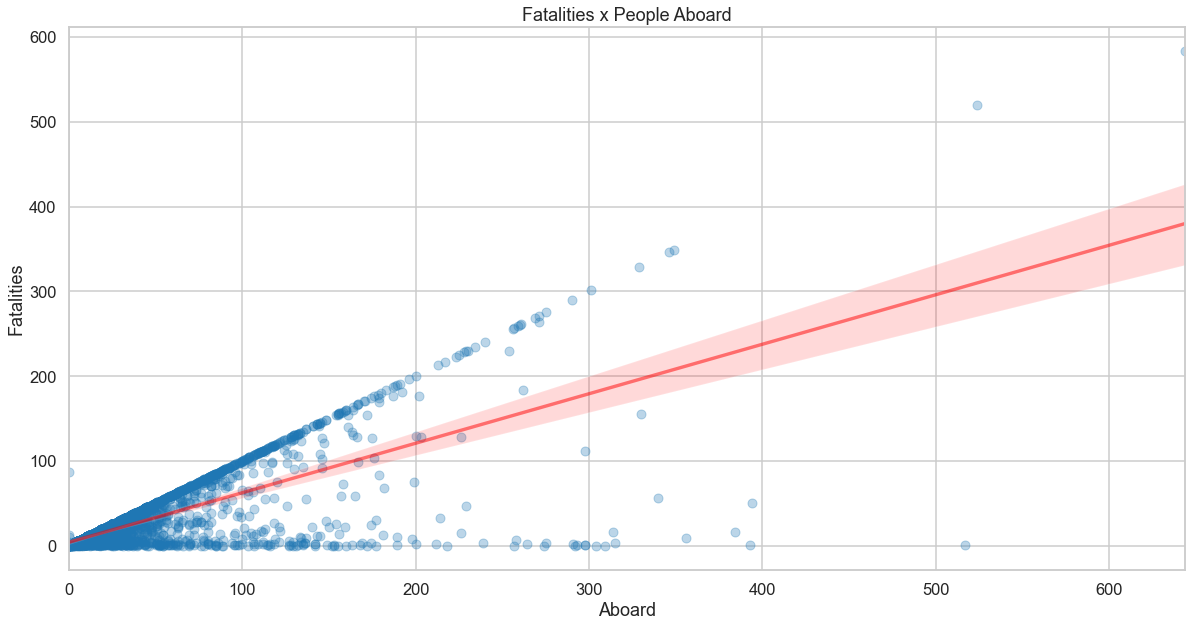

In [28]:
sns.regplot(x = 'Aboard', y = 'Fatalities', data = data, scatter_kws=dict(alpha = 0.3), line_kws=dict(color = 'red', alpha = 0.5))
plt.title('Fatalities x People Aboard')

In [29]:
#summarise
FSG_per_year = data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

Text(0.5, 1.0, 'Fatalities vs Survived vs Killed on Ground per Year')

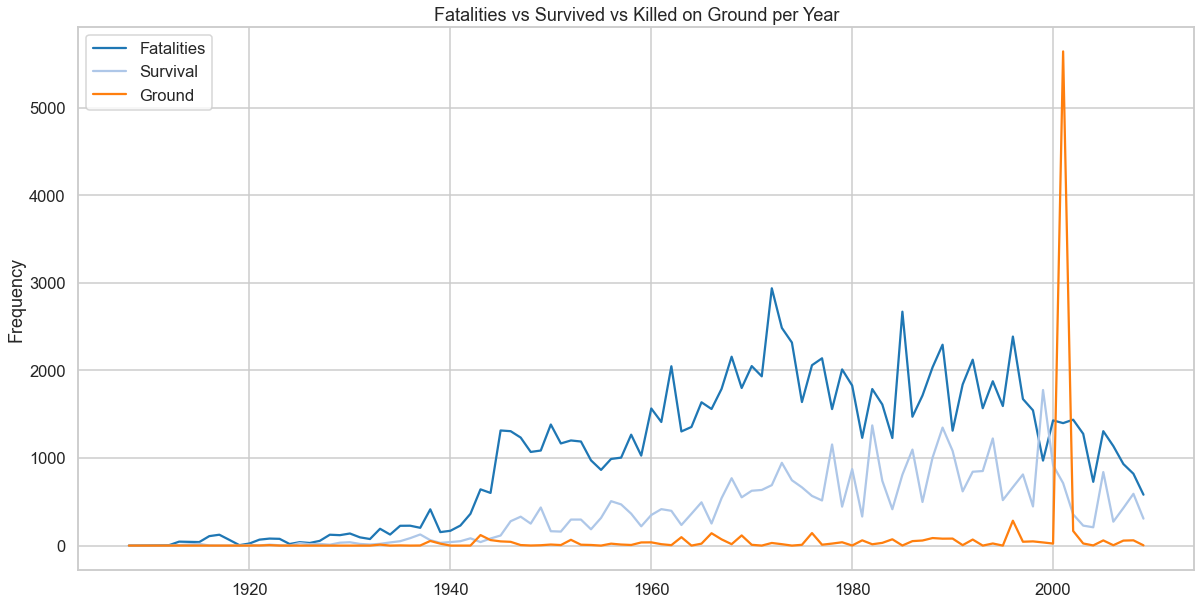

In [30]:
#plot
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year)
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [32]:
text_data = data['Summary'].dropna()
text_data = pd.DataFrame(text_data)

In [33]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [34]:
true_k = 7
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=7, n_init=1)

In [39]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:
Cluster 0:
shot
rebels
missile
surface
air
aircraft
british
forces
enemy
anti
Cluster 1:
engine
failure
crashed
taking
shortly
plane
takeoff
aircraft
emergency
lost
Cluster 2:
takeoff
crashed
shortly
engine
plane
cargo
failure
overloaded
exploded
wing
Cluster 3:
crashed
aircraft
plane
mountain
pilot
flight
taking
struck
control
crew
Cluster 4:
weather
conditions
poor
vfr
adverse
flight
continued
crashed
mountain
pilot
Cluster 5:
en
route
crashed
disappeared
mountain
plane
cargo
mountains
mountainous
wreckage
Cluster 6:
approach
runway
crashed
plane
attempting
cargo
land
landing
short
aircraft


In [42]:
data=pd.read_csv('dnm_bt.csv')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Proportion'] = (data['Ground'] / (data['Fatalities'] + data['Ground']))*100
data.Proportion = np.where(data.Proportion < 0, 0, data.Proportion)
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Proportion
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,0.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,0.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,2.0
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,2009,NaN
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,0.0
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,0.0


In [44]:
data=data.dropna()

In [45]:

data=data[['Year', 'Proportion', 'Aboard']]

data=data.astype(int)
kmeans = KMeans(n_clusters=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("category")
data

,Year,Proportion,Aboard,Cluster
0,1908,0,2,0
1,1912,0,5,0
2,1913,0,1,0
3,1913,0,20,0
4,1913,0,30,0
...,...,...,...,...
5262,2009,0,18,2
5263,2009,2,112,1
5265,2009,0,228,3
5266,2009,0,1,2


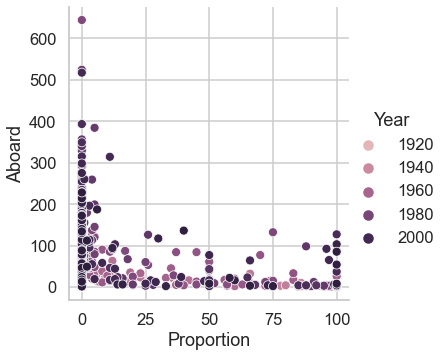

In [46]:
sns.relplot(x='Proportion', y='Aboard', hue="Year", data=data)

In [ ]:
#WORDCLOUD

In [ ]:
data['Survived Rate']=(data['Survived']/data['Aboard'])*100
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours,Survived,Proportion,Survived Rate
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,17,1.0,0.0,50.000000
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,06,0.0,0.0,0.000000
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,NaN,0.0,0.0,0.000000
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,18,6.0,0.0,30.000000
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,06,12.0,2.0,10.714286
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,0.0,The cargo plane crashed while on approach to I...,2009,NaN,0.0,0.0,0.000000
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,00,0.0,0.0,0.000000
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,08,0.0,0.0,0.000000


In [ ]:
data[["Survived Rate", "Summary"]].head(10)

,Survived Rate,Summary
0,50.000000,"During a demonstration flight, a U.S. Army fly..."
1,0.000000,First U.S. dirigible Akron exploded just offsh...
2,0.000000,The first fatal airplane accident in Canada oc...
3,30.000000,The airship flew into a thunderstorm and encou...
4,0.000000,Hydrogen gas which was being vented was sucked...
5,48.780488,Crashed into trees while attempting to land af...
6,0.000000,"Exploded and burned near Neuwerk Island, when..."
7,0.000000,"Crashed near the Black Sea, cause unknown."
8,0.000000,Shot down by British aircraft crashing in flames.
9,0.000000,Shot down in flames by the British 39th Home D...


In [ ]:
surv_rate = data.groupby("Survived Rate")
surv_rate.describe().head()



Aboard                                                          \
                count      mean        std    min    25%    50%    75%    max   
Survived Rate                                                                   
0.000000       3543.0   21.3116  33.455002    1.0    4.0   10.0   24.0  349.0   
0.558659          1.0  179.0000        NaN  179.0  179.0  179.0  179.0  179.0   
0.609756          1.0  164.0000        NaN  164.0  164.0  164.0  164.0  164.0   
0.763359          1.0  524.0000        NaN  524.0  524.0  524.0  524.0  524.0   
0.854701          1.0  117.0000        NaN  117.0  117.0  117.0  117.0  117.0   

              Fatalities              ... Survived      Proportion            \
                   count        mean  ...      75%  max      count      mean   
Survived Rate                         ...                                      
0.000000          3543.0   21.287609  ...      0.0  0.0     3543.0  1.838358   
0.558659             1.0  174.000000  ...      1.0  1.0        1.0  2.247191   
0.609756             1.0  163.000000  ...      1.0  1.0        1.0  0.000000   
0.763359             1.0  520.000000  ...      4.0  4.0        1.0  0.000000   
0.854701             1.0  116.000000  ...      1.0  1.0        1.0  0.000000   

                                                                              
                     std       min       25%       50%       75%         max  
Survived Rate                                                                 
0.000000       11.399016  0.000000  0.000000  0.000000  0.000000  100.000000  
0.558659             NaN  2.247191  2.247191  2.247191  2.247191    2.247191  
0.609756             NaN  0.000000  0.000000  0.000000  0.000000    0.000000  
0.763359             NaN  0.000000  0.000000  0.000000  0.000000    0.000000  
0.854701             NaN  0.000000  0.000000  0.000000  0.000000    0.000000  

[5 rows x 48 columns]

In [ ]:
a=surv_rate.mean().sort_values(by="Survived Rate",ascending=True).head(20)
a


,Aboard,Fatalities,Ground,Year,Survived,Proportion
Survived Rate,,,,,,
0.000000,21.3116,21.287609,2.290714,1970.746825,0.0,1.838358
0.558659,179.0000,174.000000,4.000000,1984.000000,1.0,2.247191
0.609756,164.0000,163.000000,0.000000,1971.000000,1.0,0.000000
0.763359,524.0000,520.000000,0.000000,1985.000000,4.0,0.000000
0.854701,117.0000,116.000000,0.000000,2003.000000,1.0,0.000000
0.917431,109.0000,108.000000,0.000000,2005.000000,1.0,0.000000
0.970874,103.0000,102.000000,0.000000,2003.000000,1.0,0.000000
1.086957,92.0000,91.000000,0.000000,1971.000000,1.0,0.000000
1.149425,87.0000,82.000000,4.000000,1972.000000,1.0,4.651163


In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
a=data.sort_values(by="Survived Rate",ascending=False)[:20]
a


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours,Survived,Proportion,Survived Rate
108,10/21/1926,13:15,English Channel,Imperial Airways,NaN,NaN,Handley Page W-10,G-EBMS,W10/3,12.0,0.0,0.0,The plane was on a flight from London to Paris...,1926,13,12.0,NaN,100.0
3341,06/24/1982,20:44,"Mount Galunggung, Indonesia",British Airways,009,Kuala Lampur - Perth,Boeing B-747,G-BDXH,21635/365,257.0,0.0,0.0,The aircraft flew into a plume from a volcanie...,1982,20,257.0,NaN,100.0
3767,05/24/1988,12:55,"New Orleans, Louisiana",TACA,NaN,"Belize City, Belize - New Orleans, LA",Boeing B-737-3T0,N75356,23838,45.0,0.0,0.0,The aircraft encountered heavy rain and hail w...,1988,12,45.0,NaN,100.0
1983,07/01/1965,05:29,"Kansas City, Missouri",Continental Airlines,12,"Los Angeles - Kansas City, MO",Boeing B-707-124,N70773,17609/25,66.0,0.0,0.0,The aircraft slid off the end of the runway wh...,1965,05,66.0,NaN,100.0
5186,01/17/2008,12:43,"London, England",British Airways,NaN,"Bejing, China - London, England",Boeing 777-236ER,G-YMMM,30314/342,152.0,0.0,0.0,The aircraft was on approach for landing on Ru...,2008,12,152.0,NaN,100.0
4231,03/02/1994,17:59,"New York, New York",Continental Airlines,795,New York City - Denver,McDonnell Douglas MD-82,N18835,49439,116.0,0.0,0.0,The aircraft overran the runway and came to re...,1994,17,116.0,NaN,100.0
4701,03/05/2000,18:11,"Burbank, Calilfornia",Southwest Airlines,1455,Las Vegas - Burbank,Boeing B-737-3T5,N668SW,23060/1069,142.0,0.0,0.0,"While attempting to land at Burbank Airport, t...",2000,18,142.0,NaN,100.0
3182,11/15/1979,12:00,"Near Chicago, Illinois",American Airlines,444,Chicago - Washington D.C.,Boeing B-727,NaN,NaN,78.0,0.0,0.0,While en route from Chicago to Washington an e...,1979,12,78.0,NaN,100.0
2835,08/07/1975,16:11,"Denver, Colorado",Continental Airlines,426,Denver - Wichita,Boeing B-727-224,N88777,19798/608,131.0,0.0,0.0,The aircraft climbed to about 100 feet above r...,1975,16,131.0,NaN,100.0
3541,02/19/1985,10:15,"300 nm NW of San Francisco, California",China Airlines (Taiwan),006,Taipei - Los Angeles,Boeing B-747-SP-09,N4522V,22805/564,274.0,0.0,0.0,The aircraft descended in an uncontrolable div...,1985,10,274.0,NaN,100.0


In [ ]:
a[:1]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours,Survived,Proportion,Survived Rate
108,10/21/1926,13:15,English Channel,Imperial Airways,NaN,NaN,Handley Page W-10,G-EBMS,W10/3,12.0,0.0,0.0,The plane was on a flight from London to Paris...,1926,13,12.0,NaN,100.0


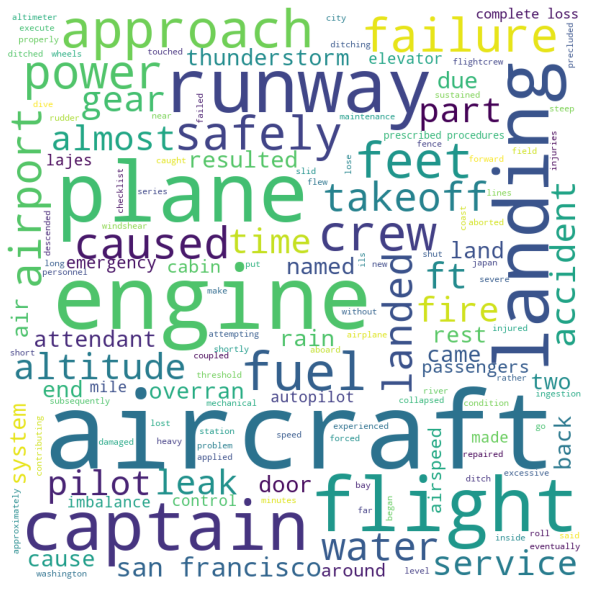

In [ ]:
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in a.Summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
b=data.sort_values(by="Survived Rate",ascending=True)[:20]
b

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Hours,Survived,Proportion,Survived Rate
2637,02/28/1973,NaN,"Szczecin, Poland",Military - Polish Air Force,NaN,NaN,Antonov An-24B,012,97305702,15.0,15.0,0.0,Crashed while en route. Twelve Interior Minis...,1973,NaN,0.0,0.0,0.0
3149,07/23/1979,NaN,"Beirut, Lebanon",Trans Mediterranean Airways,NaN,Training,Boeing 707-327C,OD-AFX,19107/507,6.0,6.0,0.0,"On a third practice touch-and-go landing, the ...",1979,NaN,0.0,0.0,0.0
3153,08/03/1979,NaN,"Leningrad, USSR",Aeroflot,NaN,NaN,LET 410M turbojet,CCCP-67206,760509,14.0,14.0,0.0,Crashed due to engine failure on approach.,1979,NaN,0.0,0.0,0.0
3154,08/04/1979,NaN,"Near Panvel, India",Indian Airlines,NaN,Bombay - Pune,Hindustan Aeronautics 748 2-224,VT-DXJ,515,45.0,45.0,0.0,Crashed into the Kiroli Hills while on approac...,1979,NaN,0.0,0.0,0.0
3155,08/04/1979,09:30,"Pistol Creek, Idaho",Boise Air Service,NaN,"Boise, ID - Indian Creek, ID",Cessna T210M,N6286B,NaN,6.0,6.0,0.0,Flew into blind canyon and crashed into trees....,1979,09,0.0,0.0,0.0
3156,08/09/1979,16:43,"Flushing, New York",Southern Jersey Air - Air Taxi,NaN,"Flushing, NY - AtlantiCity, NJ",Beechcraft D55,N105AC,NaN,3.0,3.0,0.0,Ran out of fuel on the initial climb and crash...,1979,16,0.0,0.0,0.0
3157,08/11/1979,NaN,"Near Katab, Egypt",Bahri Aviation,NaN,"Athens, Greece - Jeddah, Saudi Arabia",Learjet 35,N711AF,35-029,5.0,5.0,0.0,Crashed en route. Wreckage found in 1987.,1979,NaN,0.0,0.0,0.0
3158,08/11/1979,13:35,"Dneprodzerzhinsk, Ukraine, USSR",Aeroflot / Aeroflot,7880,Tashkent - Donetsk - Minsk /Chelyabinsk to Kis...,Tupolev TU-134A / Tupolev Tu-134A,65735/65816,2351516 / 05040,178.0,178.0,0.0,"Midair collision at 27,200 ft. Separation erro...",1979,13,0.0,0.0,0.0
3159,08/22/1979,NaN,"Bogota, Colombia",SATENA,NaN,NaN,Hawker Siddeley HS-748,FAC-1101,1702,1.0,1.0,3.0,Illegal flight.,1979,NaN,0.0,75.0,0.0
3161,08/29/1979,NaN,"Near Kirsanov, Russia",Aeroflot,NaN,NaN,Tupolev TU-124,CCCP-45038,3351003,63.0,63.0,0.0,The aircraft lost control and crashed after an...,1979,NaN,0.0,0.0,0.0


In [1]:
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in a.Summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

NameError: name 'STOPWORDS' is not defined

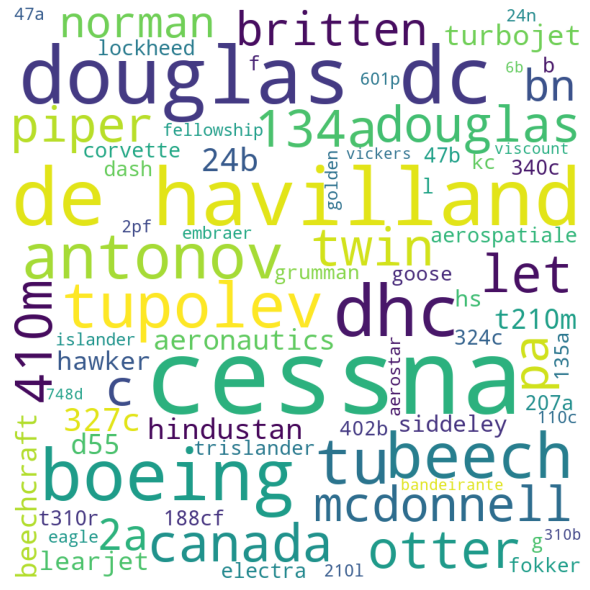

In [ ]:
c=data.sort_values(by="Survived Rate",ascending=True)[:50]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in c.Type:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

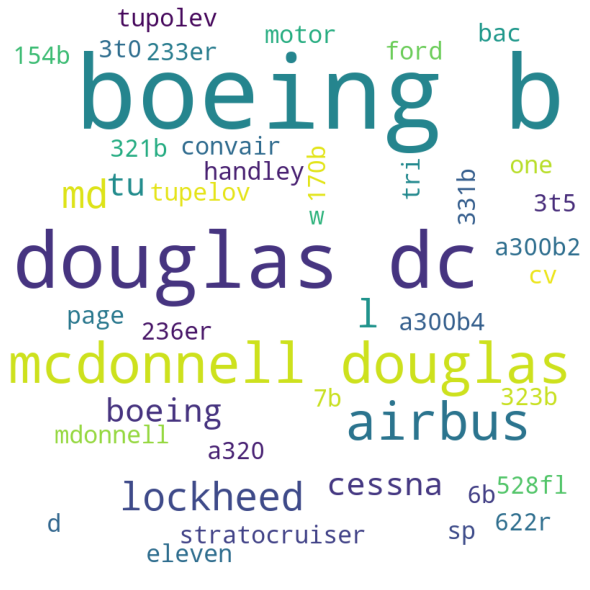

In [ ]:
c=data.sort_values(by="Survived Rate",ascending=False)[:50]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in c.Type:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

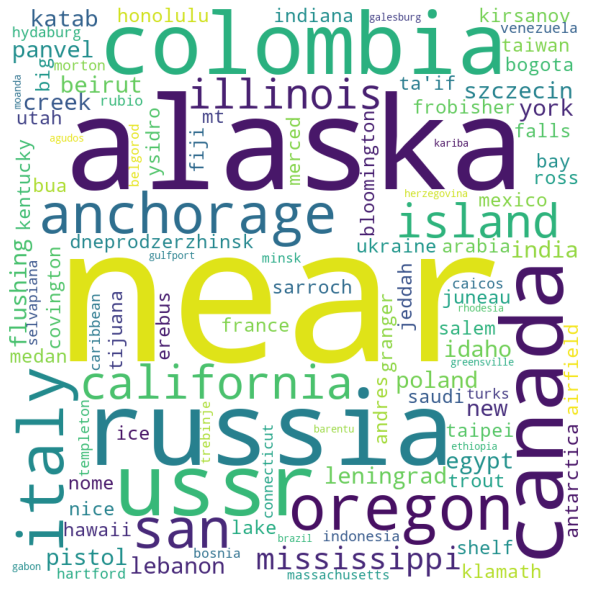

In [ ]:
d=data.sort_values(by="Survived Rate",ascending=True)[:50]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in d.Location:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

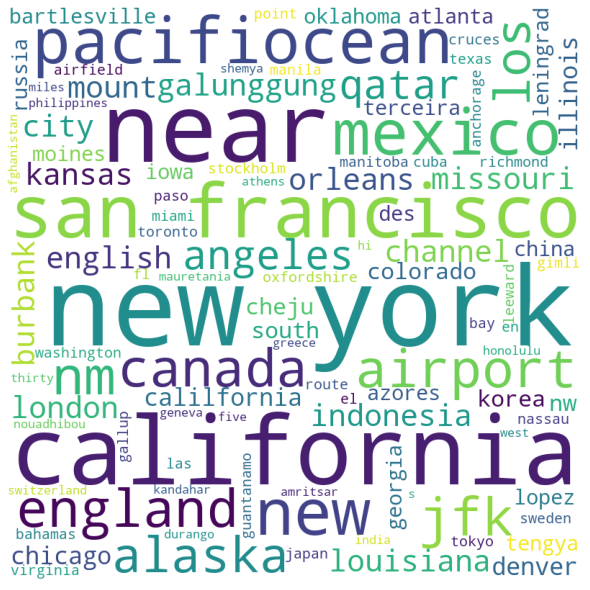

In [ ]:
d=data.sort_values(by="Survived Rate",ascending=False)[:50]
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in d.Location:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()